# CO2 Emission Prediction by Vehicles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
import warnings
warnings.filterwarnings('ignore')



## <font color='green'> EDA (Exploratory Data Analysis)</font>

In [2]:

df = pd.read_csv('co2 Emissions.csv')

In [3]:

df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:

df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [5]:

df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:

df.shape

(7385, 12)

In [8]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:

df.duplicated().sum()

1103

In [10]:

df.drop_duplicates(keep="first",inplace=True)

In [11]:
len(df)

6282

In [12]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## <font color='red'>Visualization</font>

### <font color='green'> Brands of Cars </font>

In [23]:
print("We have total",len(df['Make'].unique()),"Car Companies Data")
df_brand = df['Make'].value_counts().reset_index()
# .rename(columns=['Make','count'])
# Rename the columns to 'Brand Name' and 'Count'
df_brand.columns = ['Brand Name', 'Count']

# Create a new DataFrame 'new' with the counts
new = df_brand.copy()

# Print the first few rows of the 'new' DataFrame
print(new.head(20))
# df_brand = df['Make'].value_counts()
# df_brand.head(20)

We have total 42 Car Companies Data
       Brand Name  Count
0            FORD    577
1       CHEVROLET    515
2             BMW    501
3   MERCEDES-BENZ    365
4         PORSCHE    296
5             GMC    289
6          TOYOTA    276
7            AUDI    263
8          NISSAN    213
9            MINI    200
10           JEEP    200
11            KIA    192
12     VOLKSWAGEN    187
13        HYUNDAI    184
14          DODGE    180
15          HONDA    164
16       CADILLAC    141
17          LEXUS    129
18          MAZDA    127
19         SUBARU    119


### <font color=green> Models of cars </font>

In [28]:
print("We have total",len(df['Model'].unique()),"Car Models")
df_model = df['Model'].value_counts().reset_index().rename(columns={'count':'Count'})[:25]
df_model.head(20)

We have total 2053 Car Models


,index,Model
0,F-150 FFV,32
1,F-150 FFV 4X4,31
2,MUSTANG,27
3,FOCUS FFV,24
4,F-150 4X4,20
5,F-150,19
6,SONIC 5,18
7,ATS,18
8,JETTA,18
9,COMPASS,18


### <font color=green> Vehicle Class </font>

In [29]:
print("We have total",len(df['Vehicle Class'].unique()),"Vehicle Class")
df_vehicle_class = df['Vehicle Class'].value_counts().reset_index().rename(columns={'count':'Count'})
df_vehicle_class

We have total 16 Vehicle Class


,index,Vehicle Class
0,SUV - SMALL,1006
1,MID-SIZE,983
2,COMPACT,903
3,SUV - STANDARD,613
4,SUBCOMPACT,533
5,FULL-SIZE,508
6,PICKUP TRUCK - STANDARD,475
7,TWO-SEATER,381
8,MINICOMPACT,274
9,STATION WAGON - SMALL,214


### <font color='green'> Engine Sizes of cars</font>

In [30]:
print("We have total",len(df['Engine Size(L)'].unique()),"Types of Engine Size")
df_engine_size = df['Engine Size(L)'].value_counts().reset_index().rename(columns={'count':'Count'})
df_engine_size.head(20)

We have total 51 Types of Engine Size


,index,Engine Size(L)
0,2.0,1260
1,3.0,687
2,3.6,433
3,3.5,431
4,2.5,355
5,2.4,287
6,1.6,272
7,5.3,240
8,1.8,191
9,5.0,179


### <font color='green'> Cylinders </font>

In [31]:
print("We have total",len(df['Cylinders'].unique()),"Types of Cylinders")
df_cylinders = df['Cylinders'].value_counts().reset_index().rename(columns={'count':'Count'})
df_cylinders.head(20)

We have total 8 Types of Cylinders


,index,Cylinders
0,4,2749
1,6,2040
2,8,1202
3,12,135
4,3,88
5,10,40
6,5,26
7,16,2


### <font color='green'> Transmission of Cars </font>

In [32]:
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

#### Here we have to map similar labels into a single label for our Transmission column.

In [33]:
df["Transmission"] = np.where(df["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["M5", "M6", "M7"]), "Manual", df["Transmission"])

In [34]:
print("We have total",len(df['Transmission'].unique()),"Transmissions")
df_transmission = df['Transmission'].value_counts().reset_index().rename(columns={'count':'Count'})
df_transmission

We have total 5 Transmissions


,index,Transmission
0,Automatic with Select Shift,2722
1,Automatic,1536
2,Manual,1019
3,Automated Manual,540
4,Continuously Variable,465


In [ ]:
plt.figure(figsize=(20,5))
figure6 = sns.barplot(data = df_transmission, x = "Transmission",  y= "Count")
plt.title("All Transmissions")
plt.xlabel("Transmissions")
plt.ylabel("Cars")
plt.bar_label(figure6.containers[0])
plt.show()

### <font color='green'> Fuel Type of Cars </font>

In [35]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

#### Here we have to map similar labels into a single label for our Fuel Type column.

In [36]:
df["Fuel Type"] = np.where(df["Fuel Type"]=="Z", "Premium Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="X", "Regular Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="D", "Diesel", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="E", "Ethanol(E85)", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="N", "Natural Gas", df["Fuel Type"])

In [37]:
print("We have total",len(df['Fuel Type'].unique()),"Fuel Types")
df_fuel_type = df['Fuel Type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_fuel_type

We have total 5 Fuel Types


,index,Fuel Type
0,Regular Gasoline,3039
1,Premium Gasoline,2765
2,Ethanol(E85),330
3,Diesel,147
4,Natural Gas,1


## <font color='red'>Variation in CO2 emissions with different features.</font>

### <font color='green'> CO2 Emission with Brand </font>

In [38]:
df_co2_make = df.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

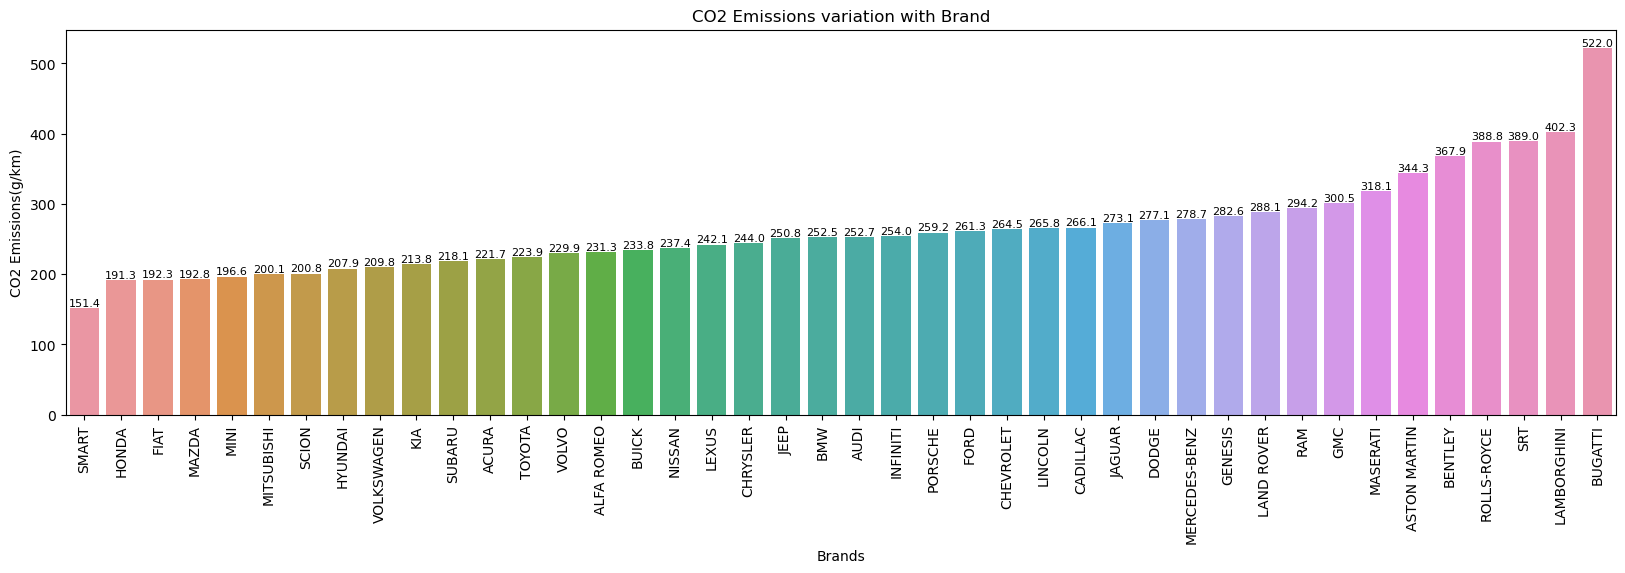

In [39]:
plt.figure(figsize=(20,5))
figure8 = sns.barplot(data = df_co2_make, x = "Make",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Brand")
plt.xlabel("Brands")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure8.containers[0], fontsize=8, fmt='%.1f')
plt.show()

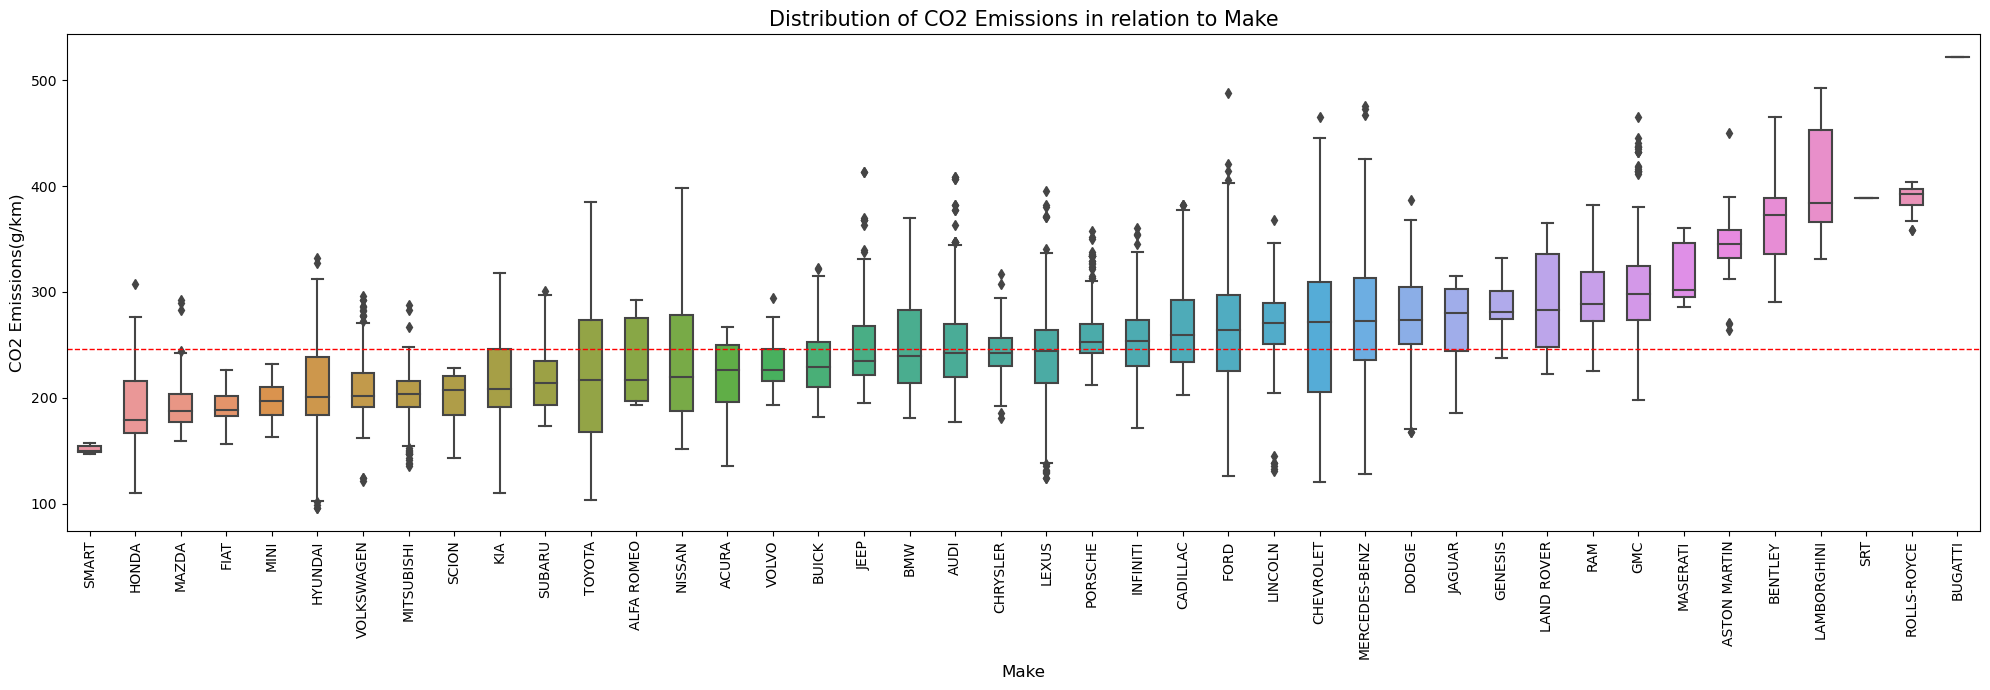

In [40]:
plt.figure(figsize=(20,7))
order = df.groupby("Make")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color='green'> CO2 Emissions variation with Vehicle Class </font>

In [41]:
df_co2_vehicle_class = df.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

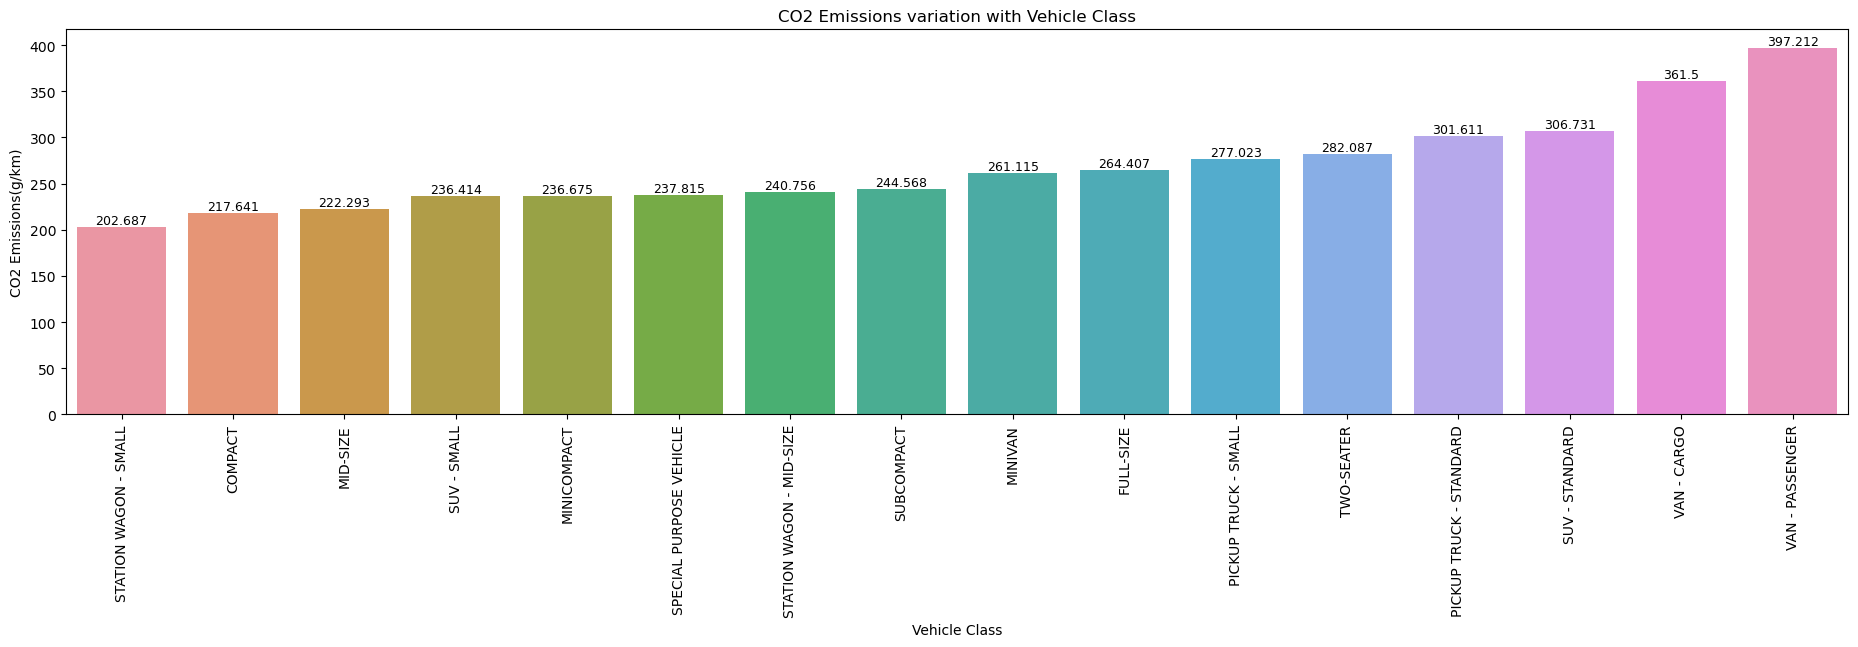

In [42]:
plt.figure(figsize=(23,5))
figure9 = sns.barplot(data = df_co2_vehicle_class, x = "Vehicle Class",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure9.containers[0], fontsize=9)
plt.show()

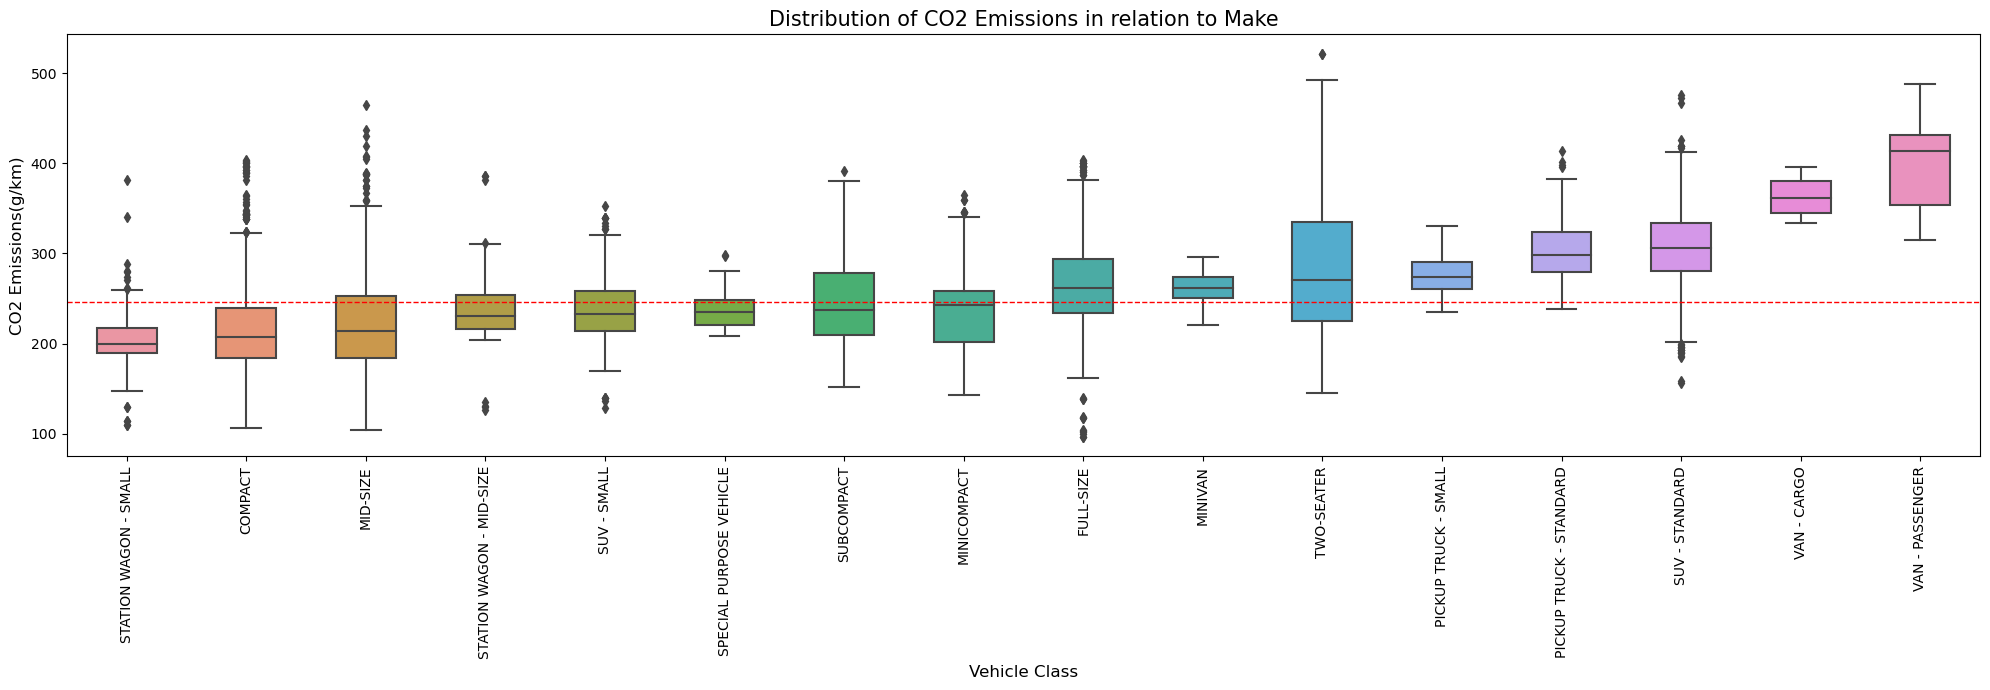

In [43]:
plt.figure(figsize=(20,7))
order = df.groupby("Vehicle Class")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color='green'> CO2 Emissions variation with Transmission </font>

In [44]:
df_co2_transmission = df.groupby(['Transmission'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

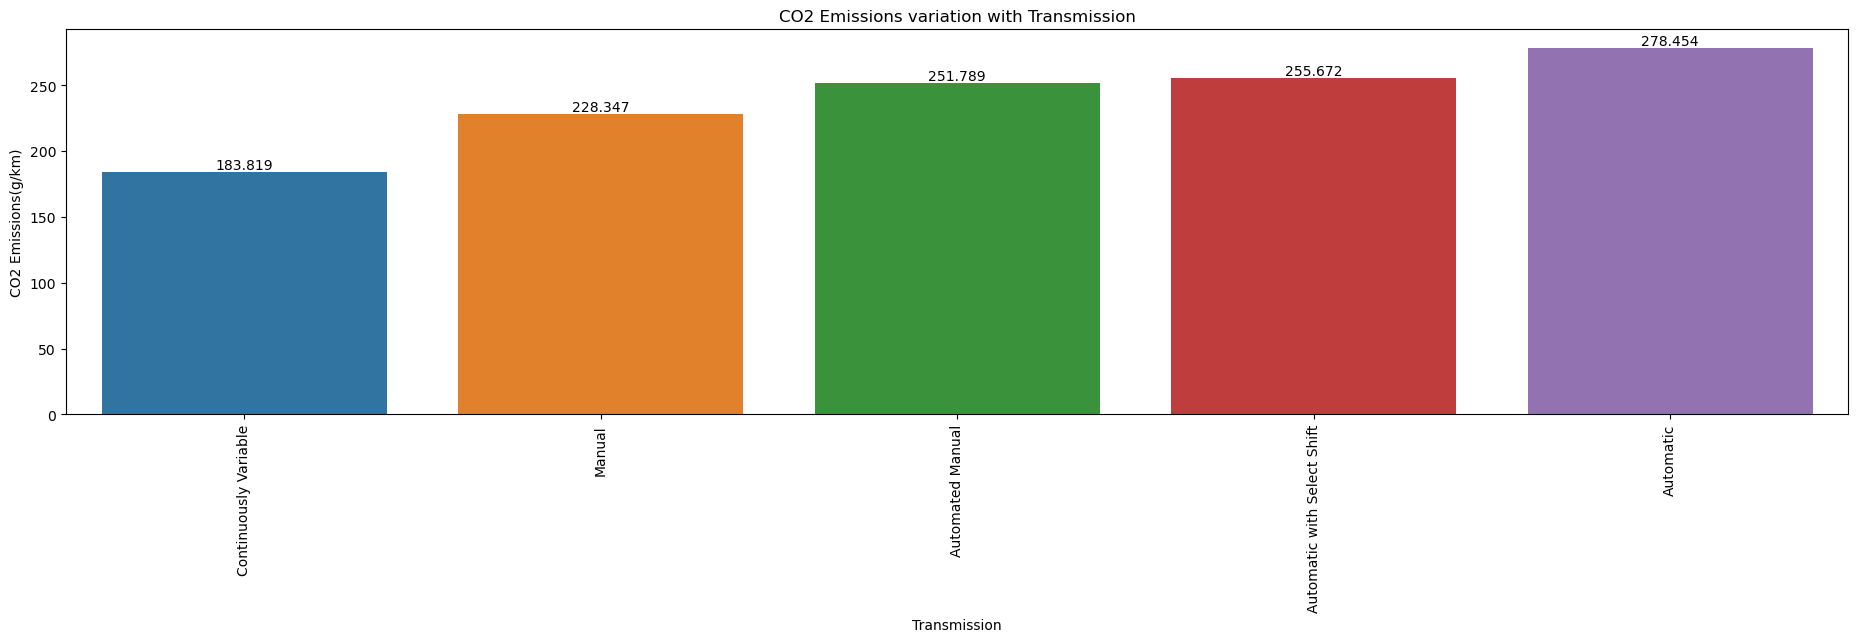

In [45]:
plt.figure(figsize=(23,5))
figure10 = sns.barplot(data = df_co2_transmission, x = "Transmission",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Transmission")
plt.xlabel("Transmission")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure10.containers[0], fontsize=10)
plt.show()

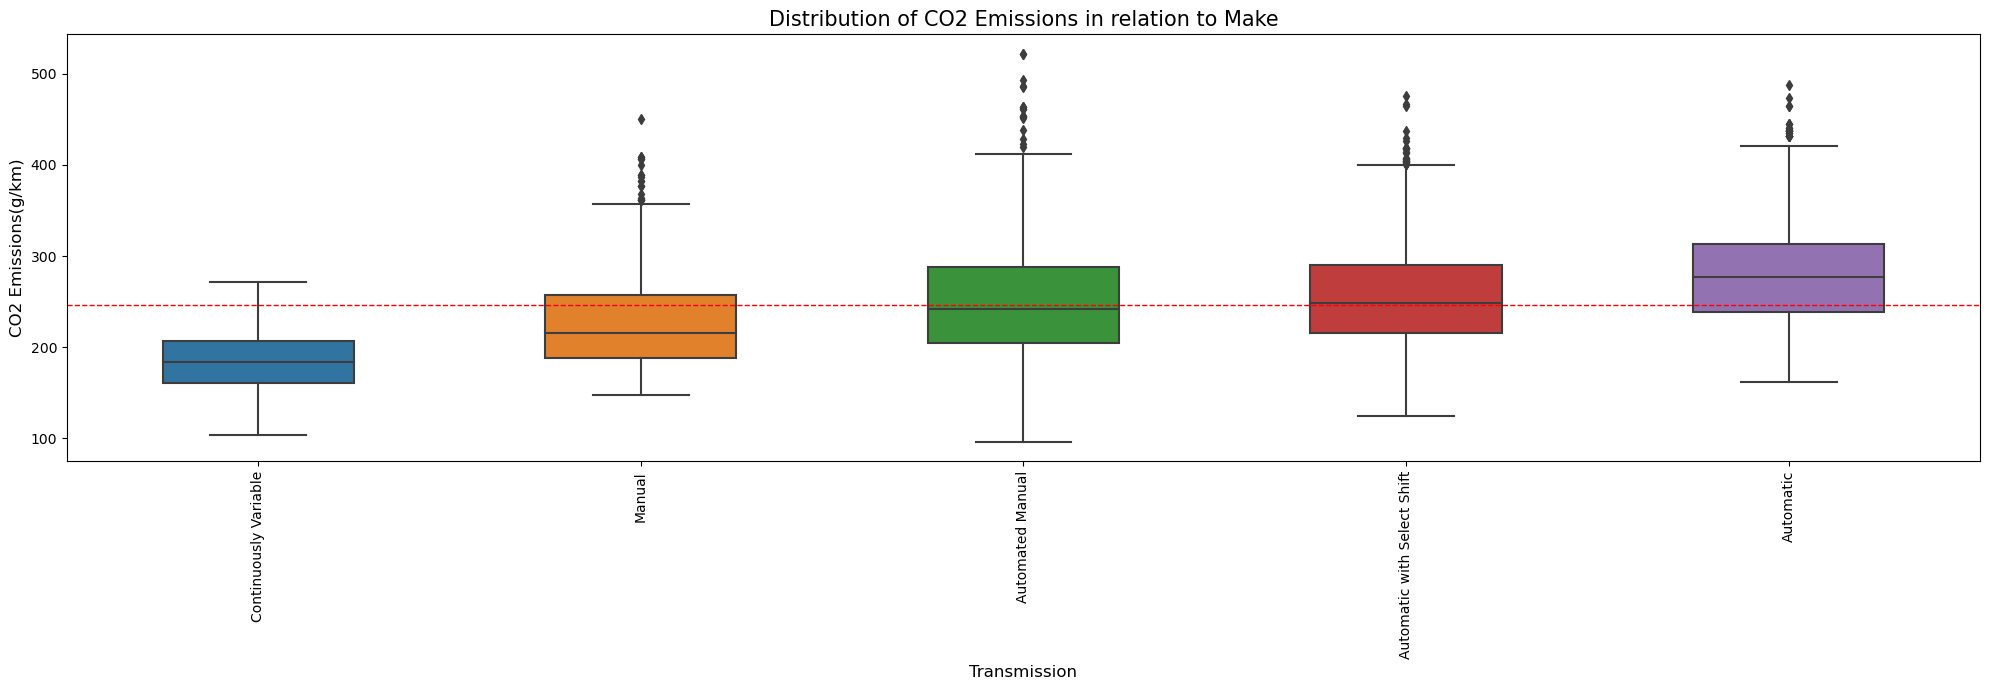

In [46]:
plt.figure(figsize=(20,7))
order = df.groupby("Transmission")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Transmission", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Transmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color='green'> CO2 Emissions variation with Fuel Type </font>

In [47]:
df_co2_fuel_type = df.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

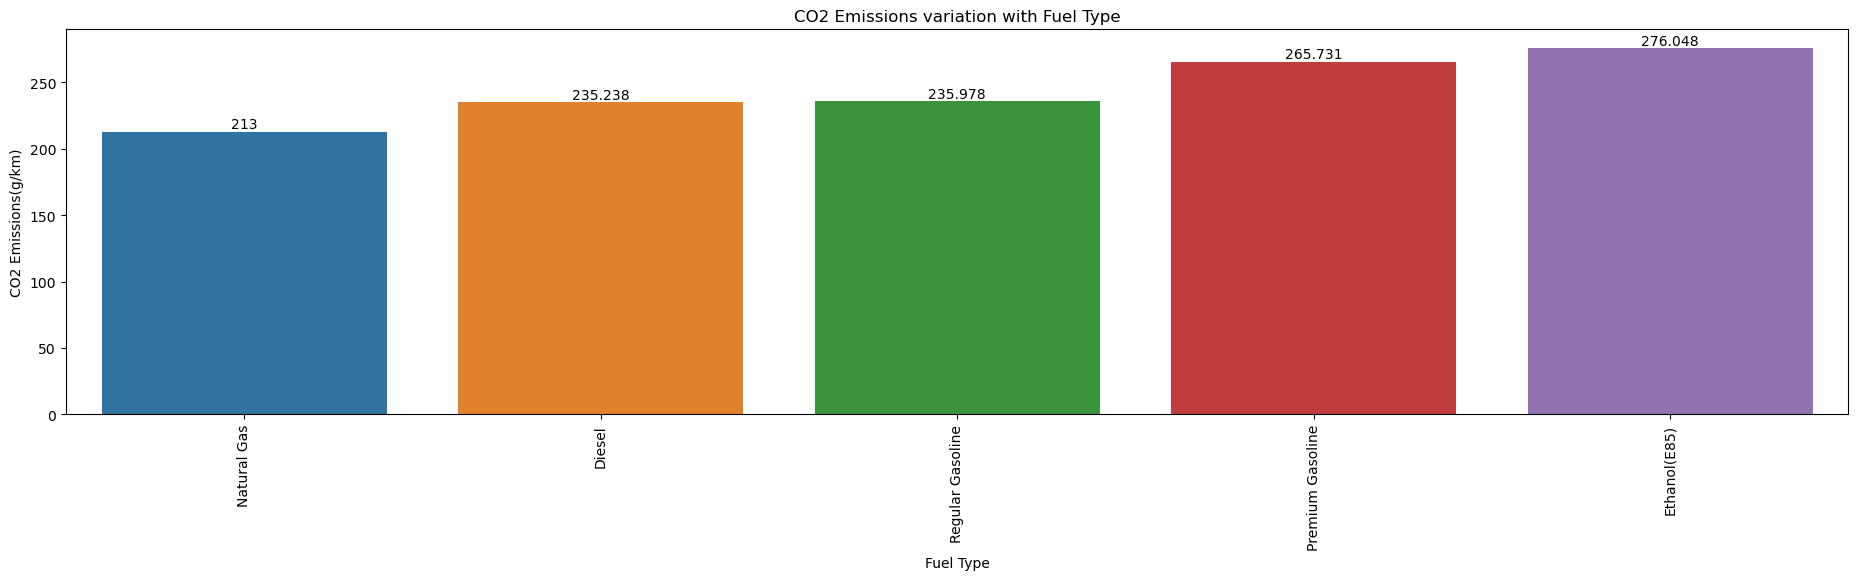

In [48]:
plt.figure(figsize=(23,5))
figure11 = sns.barplot(data = df_co2_fuel_type, x = "Fuel Type",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure11.containers[0], fontsize=10)
plt.show()

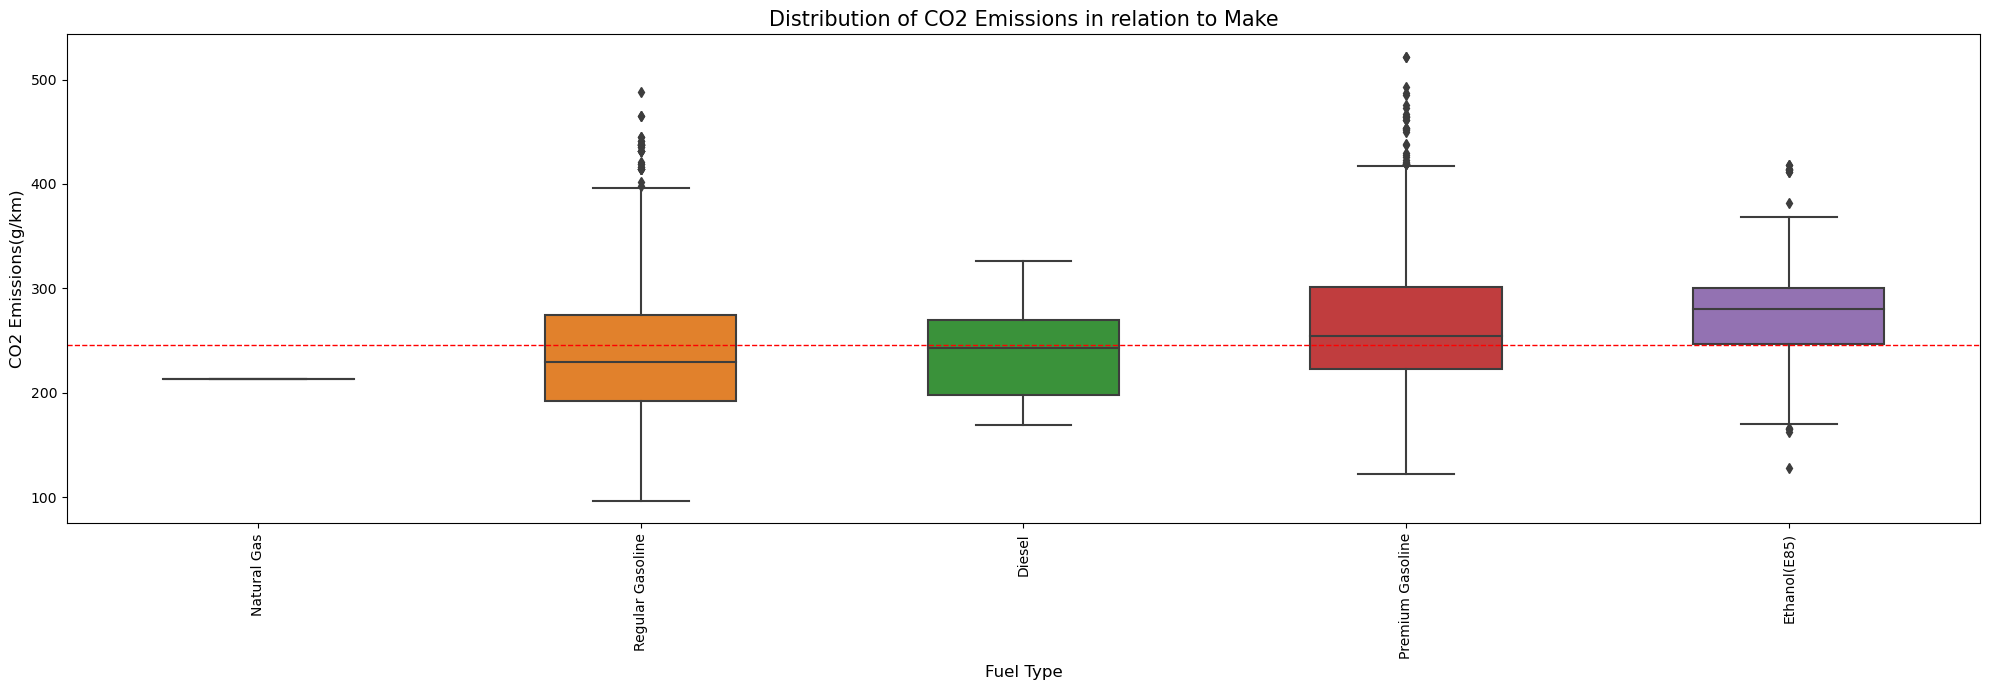

In [49]:
plt.figure(figsize=(20,7))
order = df.groupby("Fuel Type")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color=red>Conclusion Of the EDA </font>
#### 1. There are total 42 types of car brand.
#### 2. There are total 2053 unique car model. These neither can be converted into any dummy variable nor it can be used for analysis. So we can drop this column.
#### 3. There are total 16 types of vehicle class basis on their gross vehicle weight rating (GVWR) and volume index. But there are no data available with exact GVWR or volume index value, so that we can categories the similar vehicle into a same group. 
#### 4. The 27 type of transmission has been clubbed into 5 different transmission without taking the number of clutches into account, as they does not affect CO2 emissions.
#### 5. The 5 type of Fuel Types has been renamed so that it has some meaningful interpretation.
#### 6. We have only one data on natural gas. So we cannot predict anything using only one data. That's why we have to drop this row.


## <font color='red'> DATA CLEANING </font>

### <font color=green> Correlation </font>

### We have to remove Natural Gass data from our data set. Because we can predict anything by only use one record.

In [54]:
df_natural=df[df["Fuel Type"]=="Natural Gas"]
natural=df_natural.index
df_natural

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [52]:
# We have to remove Natural Gas from our data set
for i in natural:
    df.drop(i, axis = 0,inplace = True)

KeyError: '[2439] not found in axis'

In [55]:
df.reset_index(drop=True, inplace=True)

In [56]:
df[df["Fuel Type"]=="Natural Gas"]


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [57]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


In [58]:
df_check = df['Fuel Type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_check

,index,Fuel Type
0,Regular Gasoline,3039
1,Premium Gasoline,2765
2,Ethanol(E85),330
3,Diesel,147


In [59]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


In [60]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6276,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,10.7,7.7,9.4,30,219
6277,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232
6278,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.7,8.6,10.3,27,240
6279,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232
6280,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,Automatic with Select Shift,Premium Gasoline,12.2,8.7,10.7,26,248


In [61]:
FuelType = df['Fuel Type']
FuelType

0       Premium Gasoline
1       Premium Gasoline
2       Premium Gasoline
3       Premium Gasoline
4       Premium Gasoline
              ...       
6276    Premium Gasoline
6277    Premium Gasoline
6278    Premium Gasoline
6279    Premium Gasoline
6280    Premium Gasoline
Name: Fuel Type, Length: 6281, dtype: object

In [62]:
print(df.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [63]:
df.drop(['Make','Model','Vehicle Class','Transmission','Fuel Consumption Comb (mpg)'],inplace=True,axis=1)

In [64]:
df_correlation = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
df_correlation.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [65]:
df_check = df['Fuel Type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_check

,index,Fuel Type
0,Regular Gasoline,3039
1,Premium Gasoline,2765
2,Ethanol(E85),330
3,Diesel,147


In [66]:
df_correlation.corr().T

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.820145,0.854870
Cylinders,0.928843,1.000000,0.781104,0.834739
Fuel Consumption Comb (L/100 km),0.820145,0.781104,1.000000,0.916953
CO2 Emissions(g/km),0.854870,0.834739,0.916953,1.000000


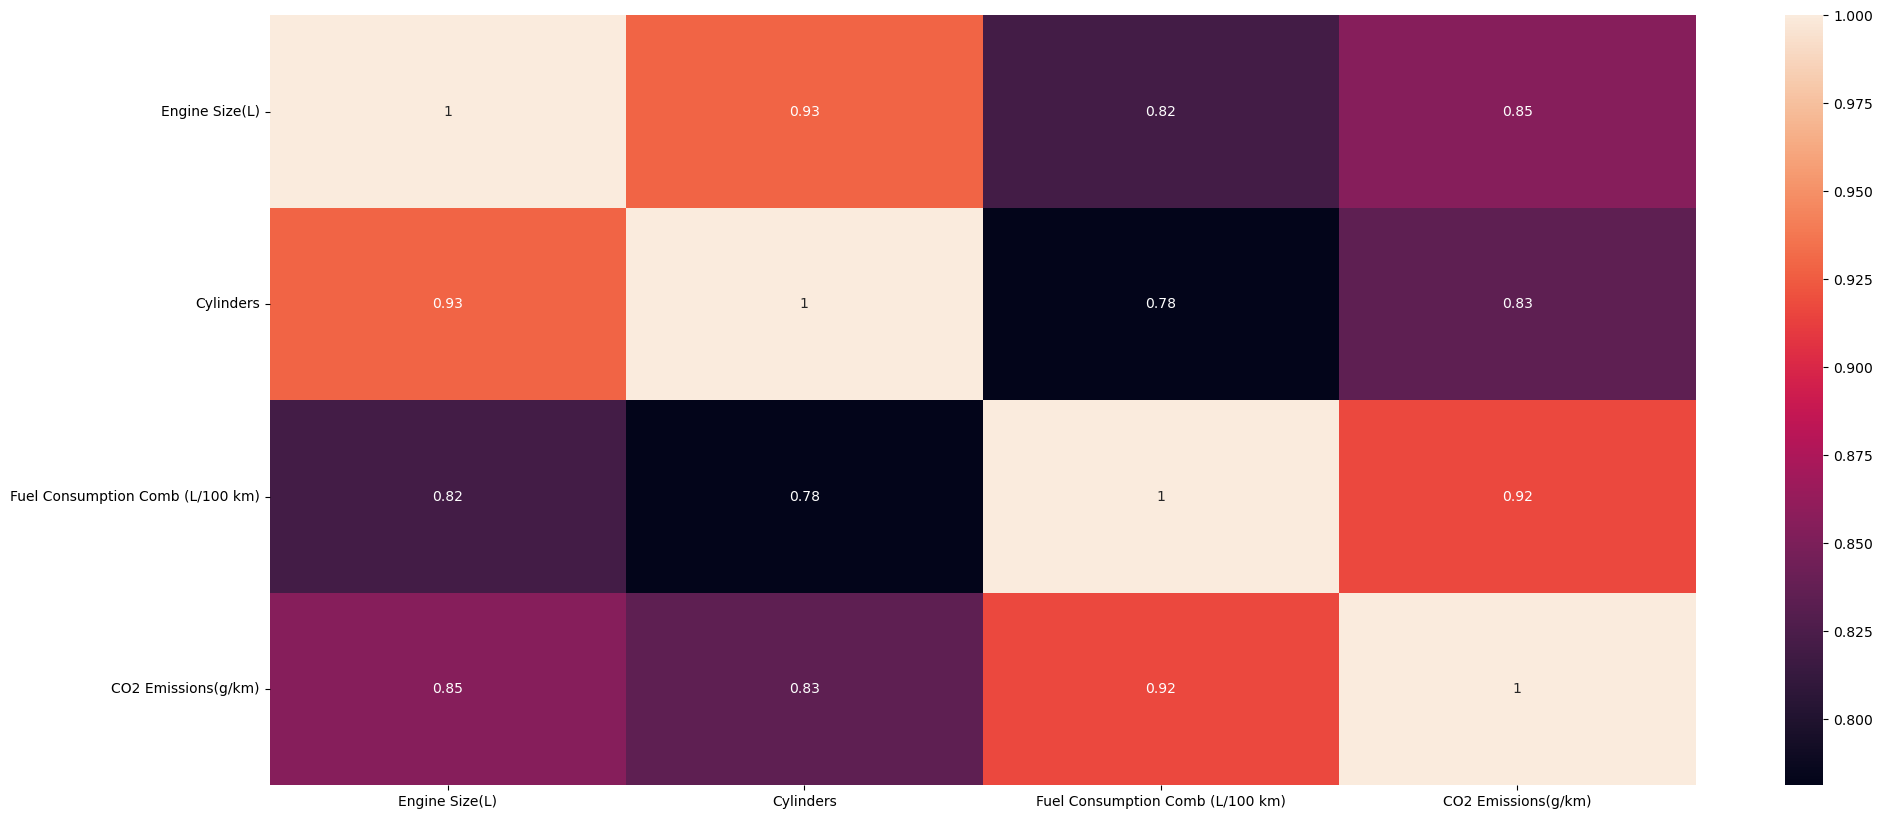

In [67]:
plt.figure(figsize = (23,10))
sns.heatmap(df_correlation.corr(), annot = True)
plt.show()

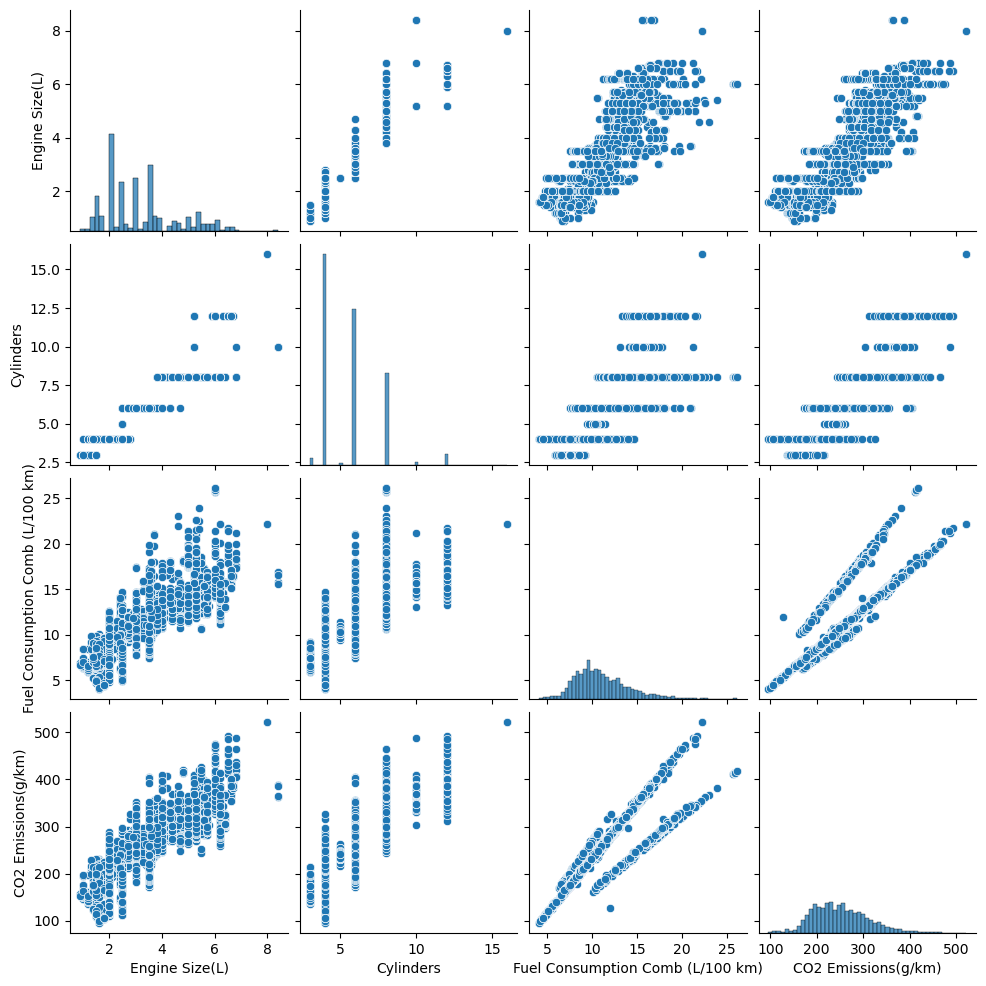

In [68]:
sns.pairplot(df_correlation)

### <font color='green'>Outliers</font>

In [69]:
df_num_features=df.select_dtypes(include=np.number)

In [70]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Engine Size(L)                       1.7
Cylinders                            2.0
Fuel Consumption City (L/100 km)     4.6
Fuel Consumption Hwy (L/100 km)      2.8
Fuel Consumption Comb (L/100 km)     3.8
CO2 Emissions(g/km)                 81.0
dtype: float64


In [71]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Engine Size(L) are 121
Total number of Outliers in column Cylinders are 177
Total number of Outliers in column Fuel Consumption City (L/100 km) are 116
Total number of Outliers in column Fuel Consumption Hwy (L/100 km) are 150
Total number of Outliers in column Fuel Consumption Comb (L/100 km) are 115
Total number of Outliers in column CO2 Emissions(g/km) are 74


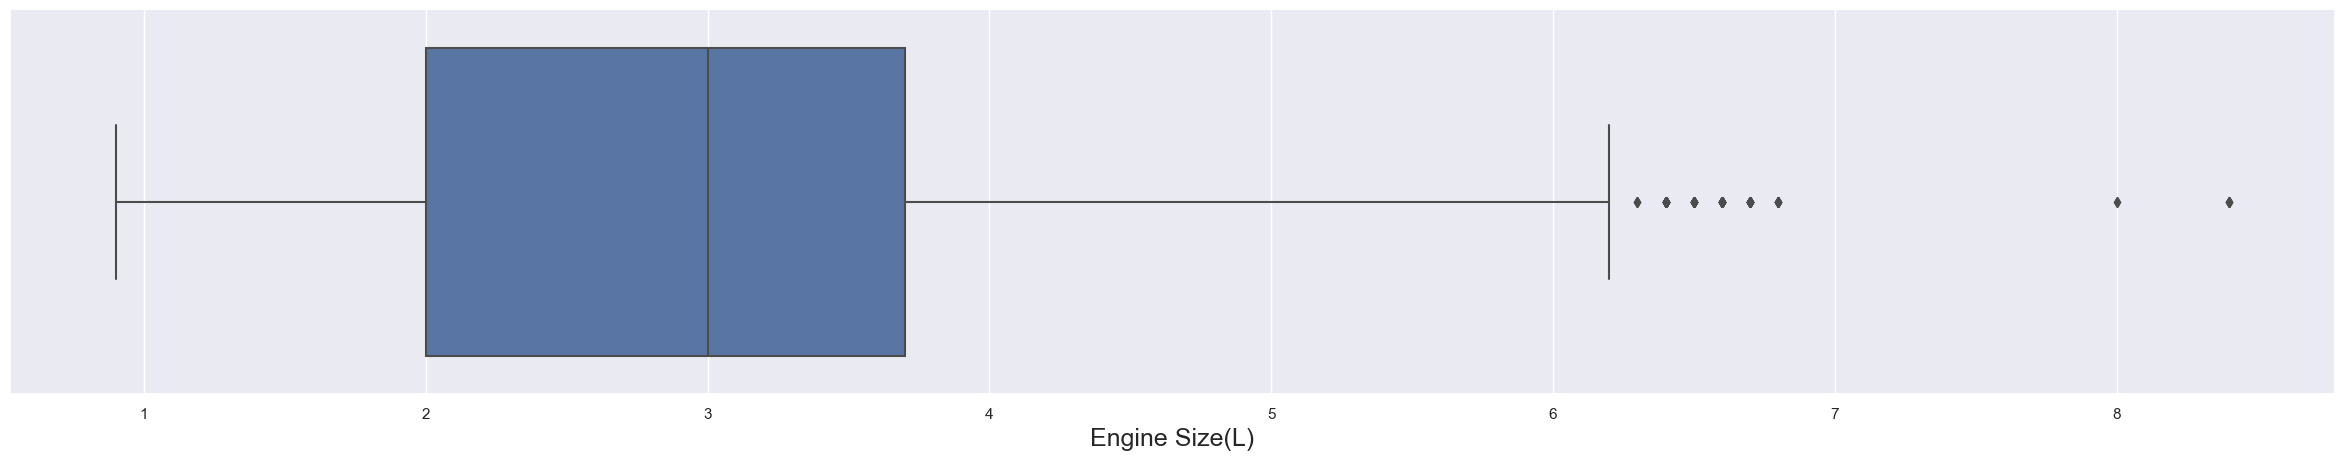

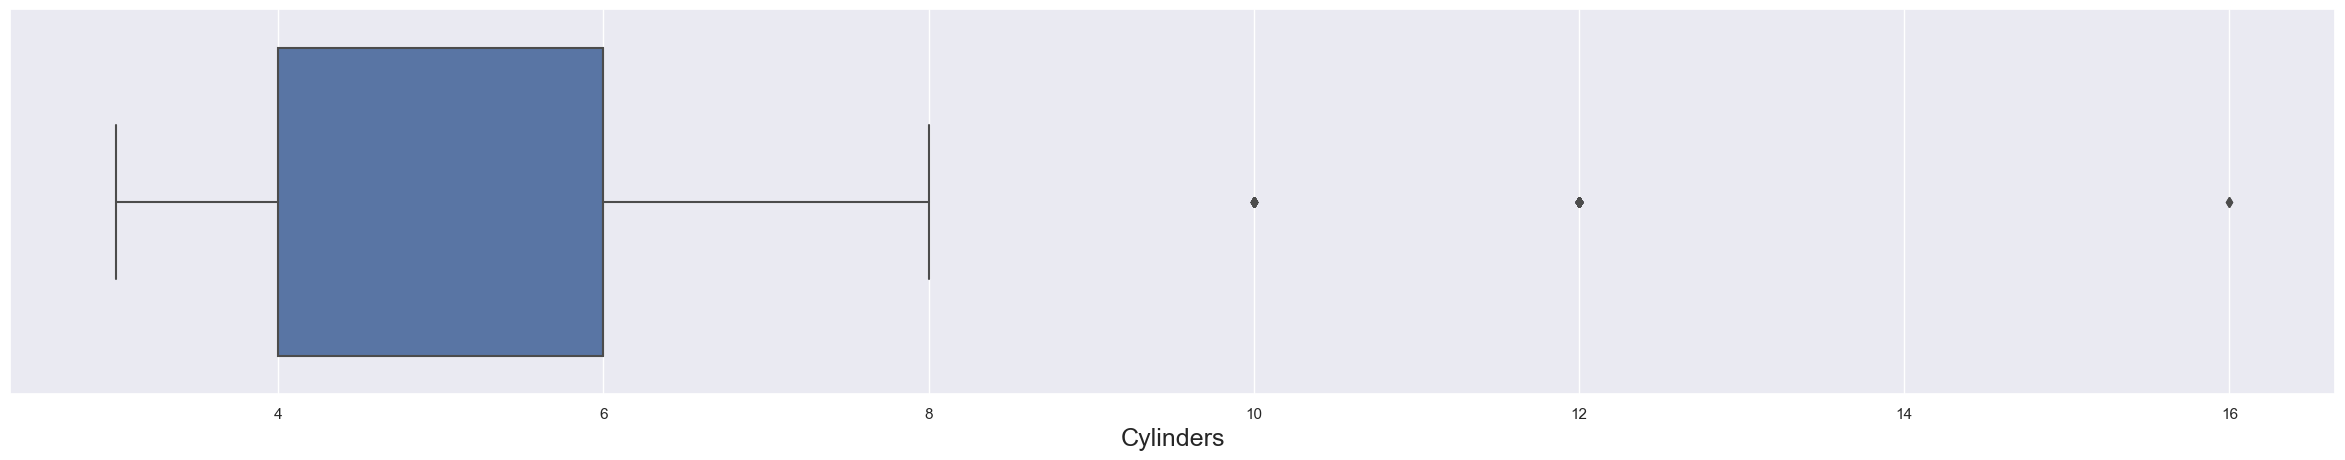

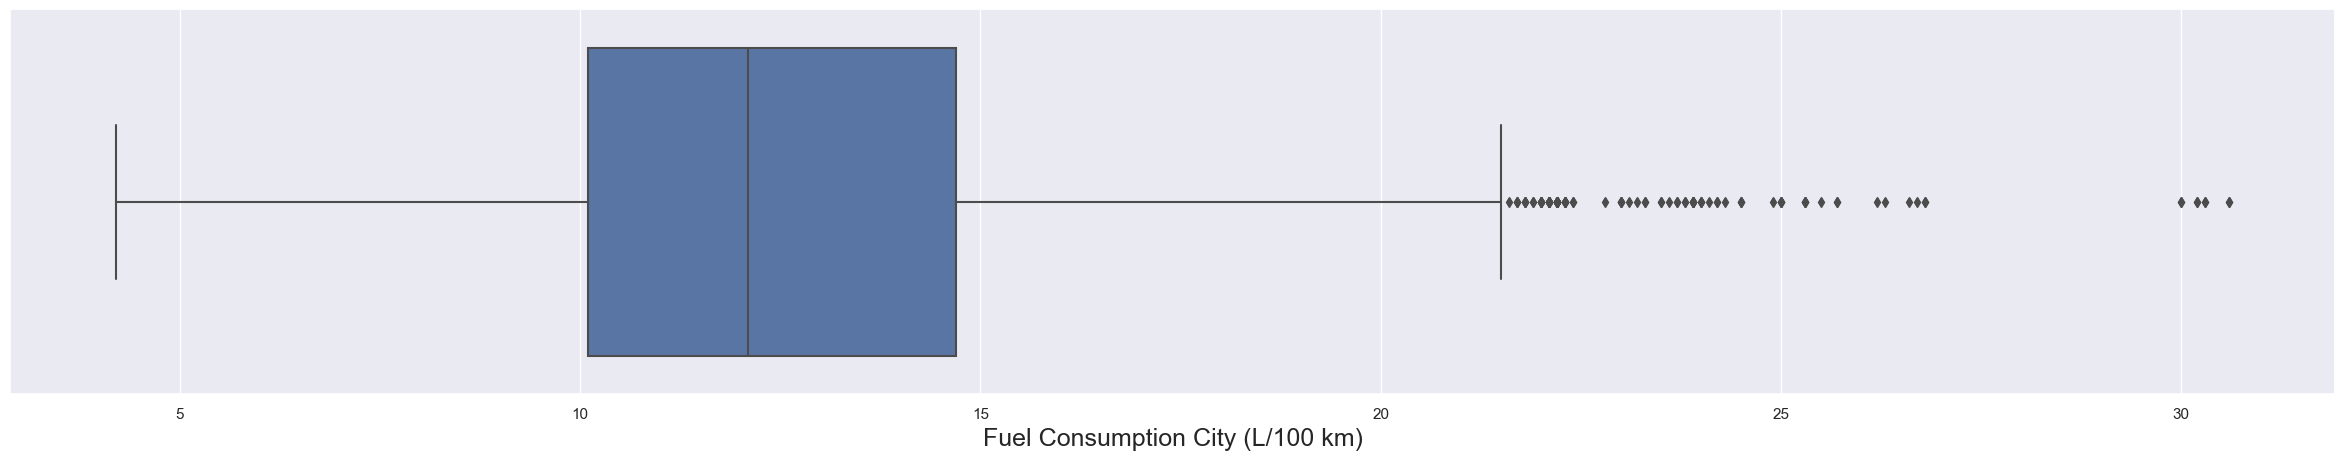

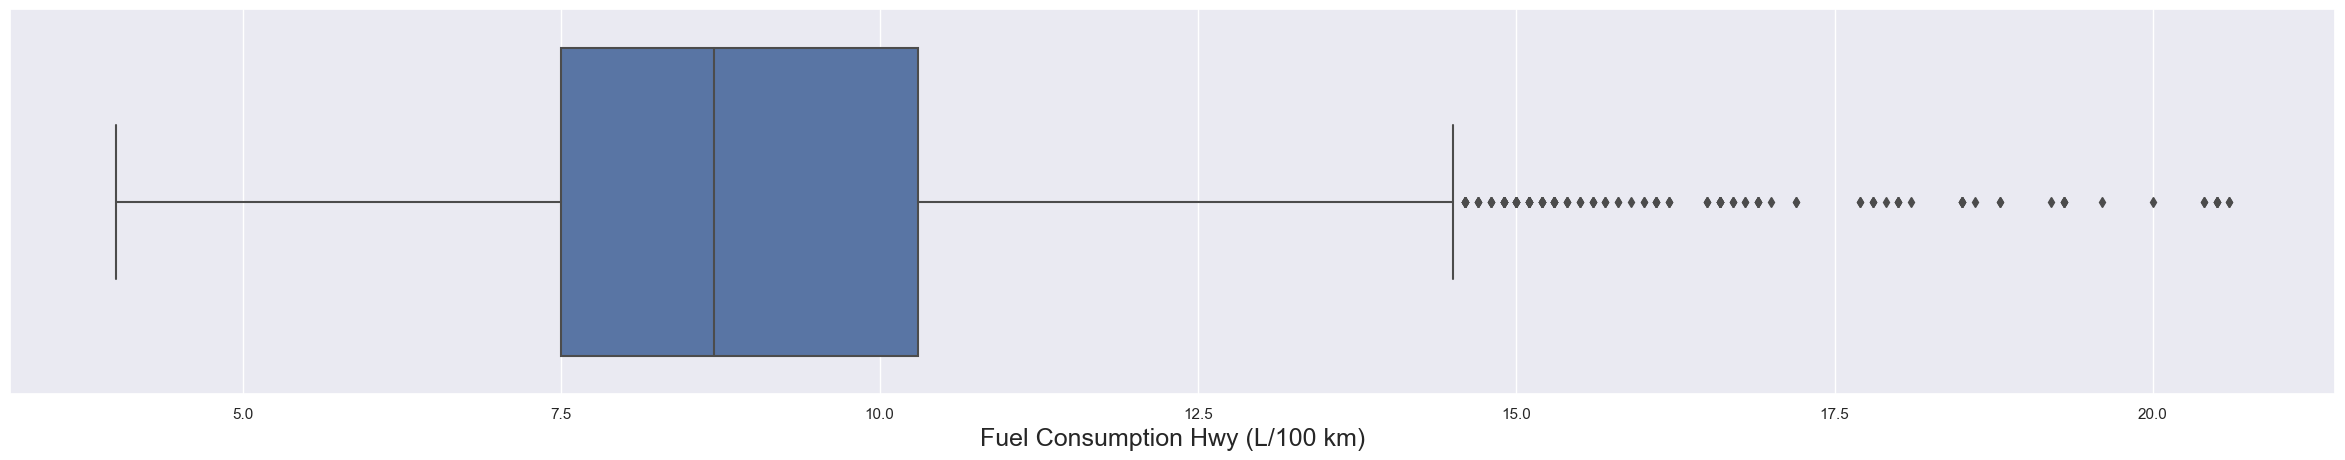

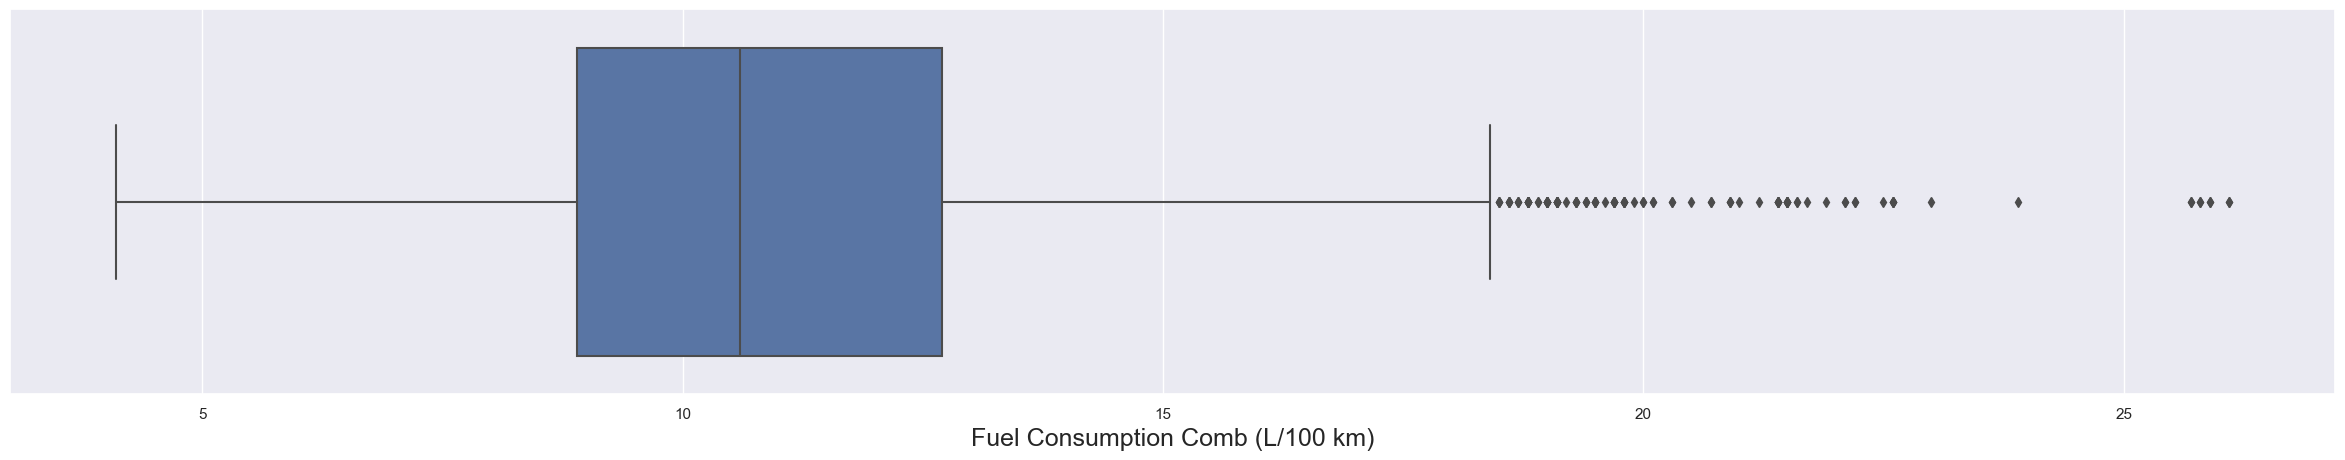

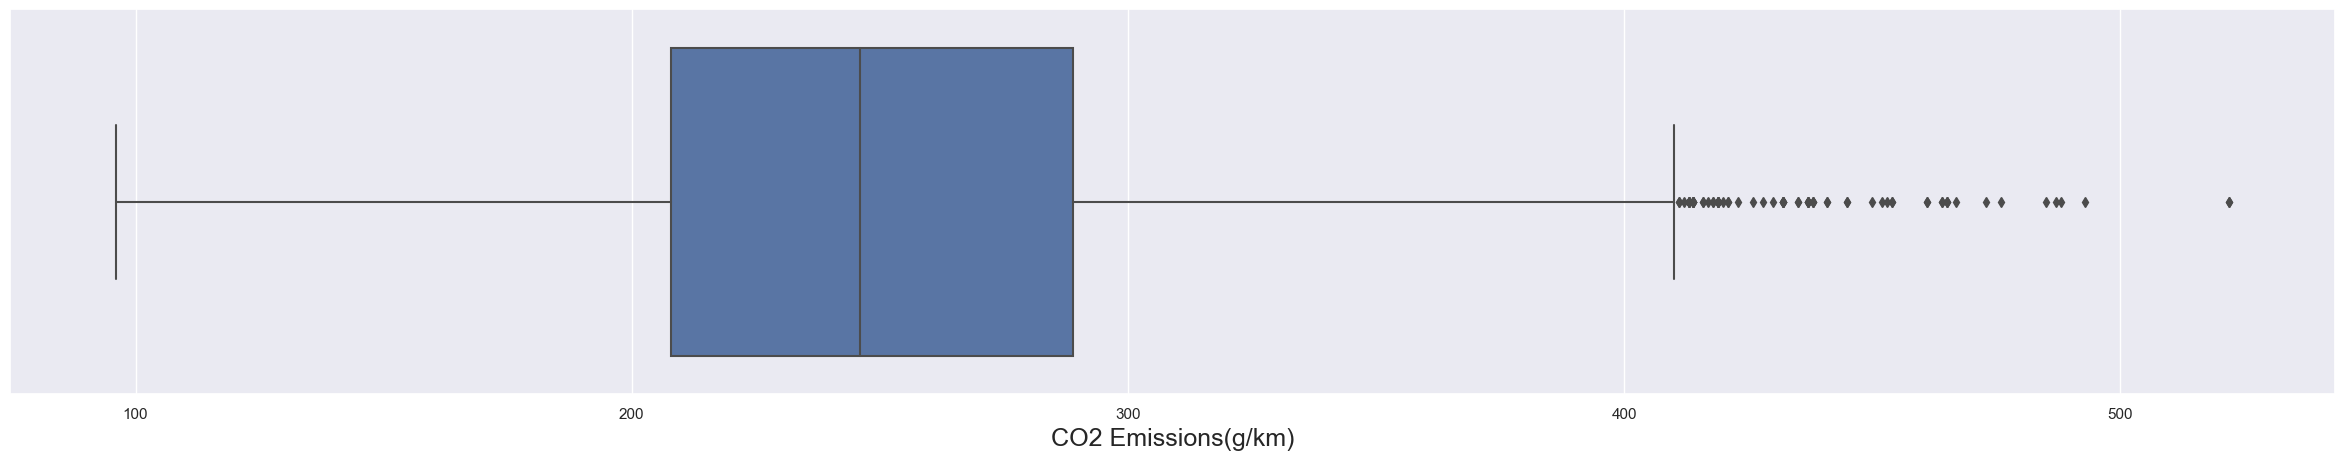

In [72]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

In [73]:
data = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
data.reset_index(inplace=True, drop=True)

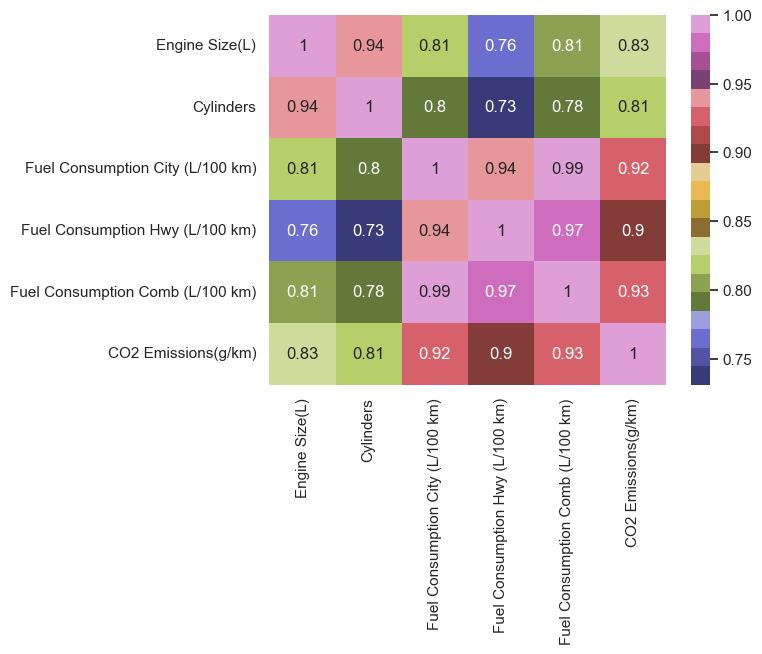

In [74]:
data_num_features = data.select_dtypes(include=np.number)

corr =  data_num_features.corr()

corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20b')
plt.show()

In [75]:
df_num_features.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [76]:
df_dummies = pd.get_dummies(data = data[["Fuel Type"]])

df_num_features=data.select_dtypes(include=np.number)

df_comb = pd.concat([df_num_features, df_dummies], axis = 1)

In [77]:
df_comb.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel Type_Diesel,Fuel Type_Ethanol(E85),Fuel Type_Premium Gasoline,Fuel Type_Regular Gasoline
0,2.0,4,9.9,6.7,8.5,196,0,0,1,0
1,2.4,4,11.2,7.7,9.6,221,0,0,1,0
2,1.5,4,6.0,5.8,5.9,136,0,0,1,0
3,3.5,6,12.7,9.1,11.1,255,0,0,1,0
4,3.5,6,12.1,8.7,10.6,244,0,0,1,0


In [ ]:
# df_num_features.drop(['Premium Gasoline','Diesel','Regular Gasoline','Ethanol(E85)'],inplace=True,axis=1)
# df_num_features.head()

### <font color='green'> Normalize </green>

In [78]:
target_column = 'CO2 Emissions(g/km)'
df_num_features.drop('CO2 Emissions(g/km)',axis=1,inplace=True)


In [79]:
print(df_num_features.columns)

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'],
      dtype='object')


In [80]:
mms = MinMaxScaler()
mmsfit = mms.fit(df_num_features)
dfx = pd.DataFrame(mms.fit_transform(df_num_features), columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'])  

In [81]:
dfx.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km)
0,0.207547,0.2,0.333333,0.257143,0.314286
1,0.283019,0.2,0.409357,0.352381,0.392857
2,0.113208,0.2,0.105263,0.171429,0.128571
3,0.490566,0.6,0.497076,0.485714,0.500000
4,0.490566,0.6,0.461988,0.447619,0.464286


In [ ]:
df = pd.concat([dfx, df_dummies], axis = 1)
df.head()

In [ ]:
column_name = 'CO2 Emissions(g/km)'
df[column_name]= df_comb[column_name]
df_comb.tail()
print(df_comb.columns)

In [ ]:
# X = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
#        'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Type_Ethanol(E85)',
#        'Fuel Type_Premium Gasoline', 'Fuel Type_Regular Gasoline']
df_comb.head()

In [ ]:
X = df_comb.drop(['CO2 Emissions(g/km)'], axis=1).astype(np.float32)

In [ ]:
y = df_comb["CO2 Emissions(g/km)"].astype(np.float32)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

# <font color='red'>Model Building</font>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### <font color='green'>RF (Random Forest)</font>

In [ ]:
def train_random_forest_model(X_train, y_train):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    rf_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, rf_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_RF": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_RF"] = result_pred["Pred_RF"].round(2)
    result_pred["Diff"] = result_pred["Pred_RF"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    model = train_random_forest_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, rf_r2_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"Cross-validated R^2 score: {rf_r2_score}")
   
    import pickle

    # Assuming 'rf_regressor' is your trained Random Forest Regressor model
    with open('random_forest_model.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)


In [ ]:
df_natural=df[df["Make"]=="Hyundai"]
natural=df_natural.index
df_natural